In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [2]:
data=pd.read_csv("LoanApprovalPrediction.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 56.2+ KB


C:\Users\mdtuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\mdtuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\mdtuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\mdtuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\mdtuf\a

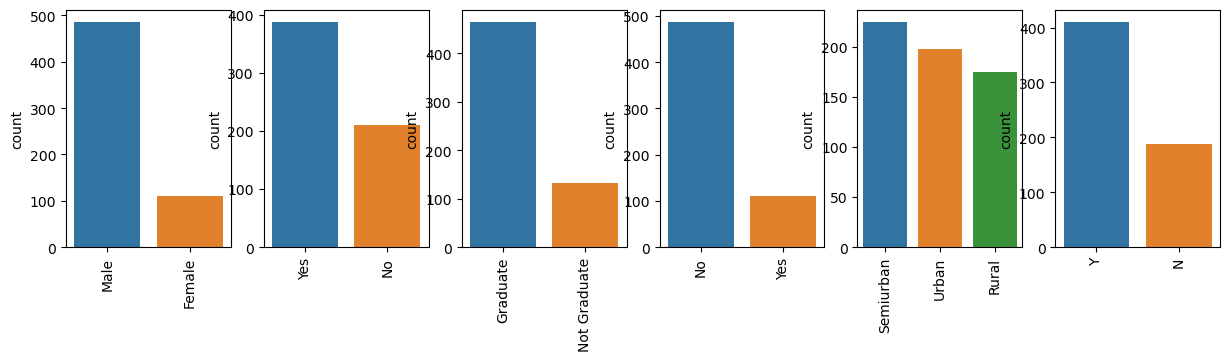

In [6]:
obj=(data.dtypes=='object')
object_cols=list(obj[obj].index)
plt.figure(figsize=(20,40))
index=1

for col in object_cols:
    y=data[col].value_counts()
    plt.subplot(11,8,index)
    plt.xticks(rotation=90)
    snr.barplot(x=list(y.index),y=y)
    index=index+1

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [8]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
data['Gender']=label_encoder.fit_transform(data['Gender'])

In [10]:
data['Gender'].unique()

array([1, 0])

In [11]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
data['Married']=label_encoder.fit_transform(data['Married'])

In [13]:
data['Married'].unique()

array([0, 1])

In [14]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
data['Education']=label_encoder.fit_transform(data['Education'])

In [16]:
data['Education'].unique()

array([0, 1])

In [17]:
data['Self_Employed']=label_encoder.fit_transform(data['Self_Employed'])

In [18]:
data['Property_Area']=label_encoder.fit_transform(data['Property_Area'])

In [19]:
data['Loan_Status']=label_encoder.fit_transform(data['Loan_Status'])

In [20]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [21]:
data.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
for col in data.columns:
    data[col]=data[col].fillna(data[col].mean())

In [23]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
x=data.drop(['Loan_Status'],axis=1) #independent variables 

In [26]:
y=data['Loan_Status'] #dependent variables 

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85) #85% of the data is used for training and 15% for testing the model

In [28]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [30]:
model.fit(x_train,y_train) #.fit() is used to train the model where input from our end is x_train and y_train

LogisticRegression()

In [31]:
y_hat=model.predict(x_test) #.predict() is used for making predictions on top of the data using ML algo. where x_test is the input 

In [32]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_hat,y_test)

In [33]:
print(ac)

0.8666666666666667


In [ ]:
#Logistic Regression, Decision Tree Classifier, 